# **Salary prediction based on experience**

In [1]:
# importing the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,r2_score

In [3]:
# step 1:Load the dataset and its preview
data = pd.read_csv('/content/synthetic_salary_prediction_data.csv')
print(data.head())

   Age  YearsExperience EducationLevel              JobTitle    Industry  \
0   47               14     Bachelor's          Data Analyst  Healthcare   
1   46               12     Bachelor's          Data Analyst     Finance   
2   55               35    High School       Sales Associate   Education   
3   57               30       Master's  Marketing Specialist     Finance   
4   55               20    High School       Project Manager  Healthcare   

        Location  AnnualSalary  
0        Seattle         74746  
1       New York         68418  
2        Houston        113002  
3  San Francisco        100868  
4       New York         78093  


In [4]:
# step 2: Data Cleaning
print(data.isnull().sum())
data.drop_duplicates(inplace=True)

Age                0
YearsExperience    0
EducationLevel     0
JobTitle           0
Industry           0
Location           0
AnnualSalary       0
dtype: int64


In [5]:
# For simplicity, let's drop 'Age' and 'Job Title' as they may not contribute significantly to salary
data.drop(['Age', 'JobTitle'], axis=1, inplace=True)

In [6]:
#let's check data again
print(data.head())


   YearsExperience EducationLevel    Industry       Location  AnnualSalary
0               14     Bachelor's  Healthcare        Seattle         74746
1               12     Bachelor's     Finance       New York         68418
2               35    High School   Education        Houston        113002
3               30       Master's     Finance  San Francisco        100868
4               20    High School  Healthcare       New York         78093


In [7]:
# step 4: Encoding categorical variables
data = pd.get_dummies(data, columns=['Location', 'EducationLevel','Industry'], drop_first=True)


In [8]:
# let's check data again
print(data.head())

   YearsExperience  AnnualSalary  Location_Houston  Location_New York  \
0               14         74746             False              False   
1               12         68418             False               True   
2               35        113002              True              False   
3               30        100868             False              False   
4               20         78093             False               True   

   Location_San Francisco  Location_Seattle  EducationLevel_High School  \
0                   False              True                       False   
1                   False             False                       False   
2                   False             False                        True   
3                    True             False                       False   
4                   False             False                        True   

   EducationLevel_Master's  EducationLevel_PhD  Industry_Finance  \
0                    False               F

In [9]:
# Step 5: Feature Scaling
scaler = StandardScaler()
data[['YearsExperience']] = scaler.fit_transform(data[['YearsExperience']])

In [10]:
print(data.head())

   YearsExperience  AnnualSalary  Location_Houston  Location_New York  \
0        -0.521391         74746             False              False   
1        -0.690564         68418             False               True   
2         1.254924        113002              True              False   
3         0.831992        100868             False              False   
4        -0.013872         78093             False               True   

   Location_San Francisco  Location_Seattle  EducationLevel_High School  \
0                   False              True                       False   
1                   False             False                       False   
2                   False             False                        True   
3                    True             False                       False   
4                   False             False                        True   

   EducationLevel_Master's  EducationLevel_PhD  Industry_Finance  \
0                    False               F

In [11]:
# step 6: Train-Test-Split
X = data.drop('AnnualSalary',axis=1) #Features
y = data['AnnualSalary'] #Target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
# lets see and check target variable and other independent features along with X_tain, X_train,
print('Features')
print(X)
print('Target variable')
print(y)
print('x-train,x-test,y-train,y-test')
print(X_train)
print(X_test)
print(y_train)
print(y_test)

Features
     YearsExperience  Location_Houston  Location_New York  \
0          -0.521391             False              False   
1          -0.690564             False               True   
2           1.254924              True              False   
3           0.831992             False              False   
4          -0.013872             False               True   
..               ...               ...                ...   
495         0.324473             False              False   
496        -0.775150             False              False   
497         1.508683              True              False   
498         0.155301              True              False   
499         0.578233             False              False   

     Location_San Francisco  Location_Seattle  EducationLevel_High School  \
0                     False              True                       False   
1                     False             False                       False   
2                     False

In [ ]:
# step 7: Build and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# step 8: Make predictions
y_pred = model.predict(X_test)

In [ ]:
# step 9: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Absolute Error: 7695.759881515986
R-squared: 0.8641694935349226


In [ ]:
# Show some predictions vs actual
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head())

     Actual      Predicted
361   81735   94141.023017
73   113303  101598.329570
374   93218   85626.456974
155  108154  112407.238662
104  120767  117487.417984


In [ ]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

# Define parameter grid
param_grid = {'fit_intercept': [True, False]}

# Initialize GridSearchCV
grid = GridSearchCV(estimator=LinearRegression(), param_grid=param_grid, cv=5)

# Fit GridSearchCV on the training data
grid.fit(X_train_scaled, y_train)

# Get the best model
best_model = grid.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test_scaled)

# Print the best parameters
print(f"Best parameters: {grid.best_params_}")


Best parameters: {'fit_intercept': True}


In [ ]:
from sklearn.linear_model import Ridge
ridge_model=Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled,y_train)
y_pred=ridge_model.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import mean_absolute_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Absolute Error: 7697.252187984525
R-squared: 0.8641850167919222


# Data Visualization


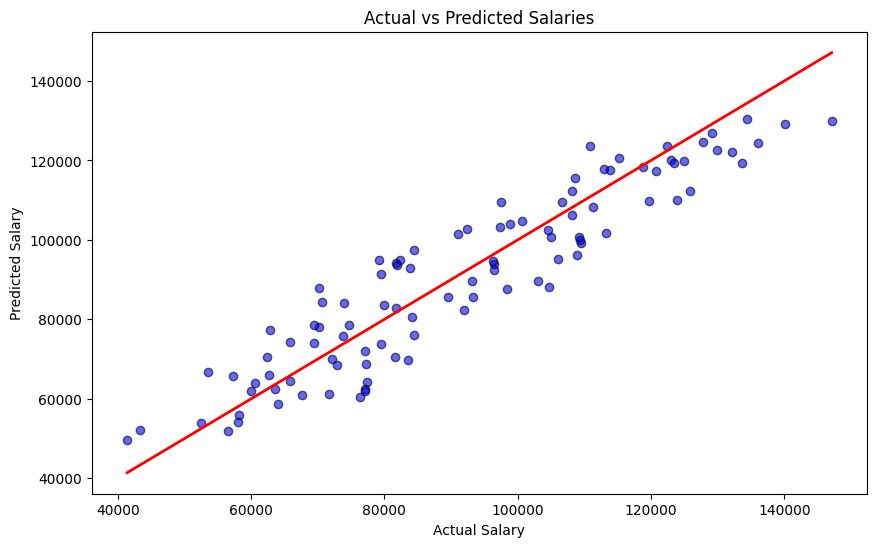

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred,color='blue',edgecolor='k',alpha=0.6)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color='red',linewidth=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salaries')
plt.show()